In [146]:
import json
with open("logins.json", "r") as read_file:
    data = json.load(read_file)

In [147]:
import pandas as pd

df = pd.DataFrame()
df['datetime'] = data['login_time']
df['count'] = 1
df['datetime'] = pd.to_datetime(df['datetime'])

In [148]:
df_count = df.set_index('datetime').groupby(pd.Grouper(freq='15T')).count()
print(df_count.tail())

                     count
datetime                  
1970-04-13 17:45:00      5
1970-04-13 18:00:00      5
1970-04-13 18:15:00      2
1970-04-13 18:30:00      7
1970-04-13 18:45:00      6


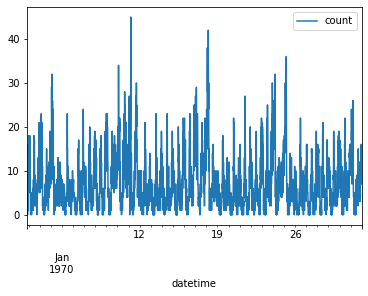

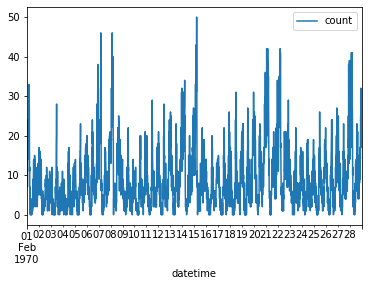

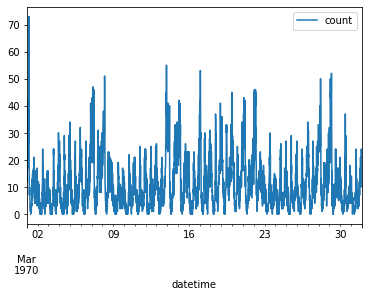

In [149]:
import matplotlib.pyplot as plt

df_count['1970-01'].plot()
df_count['1970-02'].plot()
df_count['1970-03'].plot()

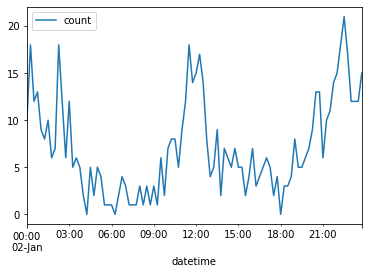

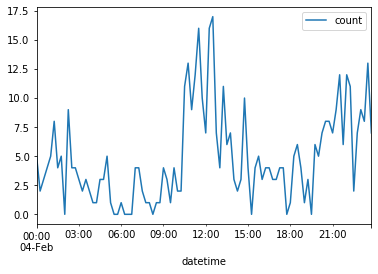

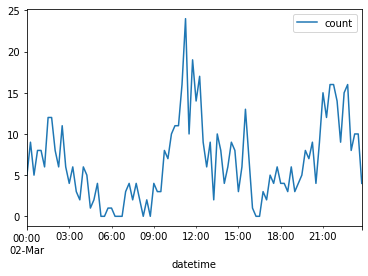

In [150]:
##

df_count['1970-01-02'].plot()
df_count['1970-02-04'].plot()
df_count['1970-03-02'].plot()

In [151]:
with open("ultimate_data_challenge.json", "r") as read_file:
    data = json.load(read_file)


In [152]:
df = pd.DataFrame(data)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [153]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [155]:
# df.head()
# current_date - timedelta(days=30)
for index, row in df.iterrows():
    if row['last_trip_date'] < current_date - timedelta(days=30):
        df.loc[index,'deactivation_date'] = row['last_trip_date'] + timedelta(days=30)

In [156]:
df.loc[df['last_trip_date'] < current_date - timedelta(days=30) , 'deactivated'] = True
df.loc[df['last_trip_date'] >= current_date - timedelta(days=30) , 'deactivated'] = False

In [196]:
df.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,deactivation_date,deactivated
0,3.67,5.0,4.7,1.10,1,2014-06-17,2,2014-01-25,15.4,4,1,46.2,NaT,False
1,8.26,5.0,5.0,1.00,0,2014-05-05,0,2014-01-29,0.0,0,0,50.0,2014-06-04,True
2,0.77,5.0,4.3,1.00,0,2014-01-07,2,2014-01-06,0.0,3,0,100.0,2014-02-06,True
3,2.36,4.9,4.6,1.14,1,2014-06-29,2,2014-01-10,20.0,9,1,80.0,NaT,False
4,3.13,4.9,4.4,1.19,2,2014-03-15,0,2014-01-27,11.8,14,0,82.4,2014-04-14,True
5,10.56,5.0,3.5,1.00,2,2014-06-06,2,2014-01-09,0.0,2,1,100.0,NaT,False
6,3.95,4.0,NaN,1.00,0,2014-01-25,0,2014-01-24,0.0,1,0,100.0,2014-02-24,True
7,2.04,5.0,5.0,1.00,2,2014-01-29,2,2014-01-28,0.0,2,0,100.0,2014-02-28,True
8,4.36,5.0,4.5,1.00,2,2014-02-01,0,2014-01-21,0.0,2,0,100.0,2014-03-03,True
9,2.37,5.0,NaN,1.00,2,2014-01-05,0,2014-01-03,0.0,1,0,0.0,2014-02-04,True


In [158]:
df_deactivation = df.loc[df['deactivated'] == True].groupby(pd.Grouper(key = 'deactivation_date', freq='5D')).count()['deactivated']

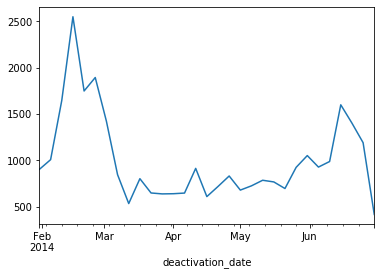

In [159]:
df_deactivation.plot()

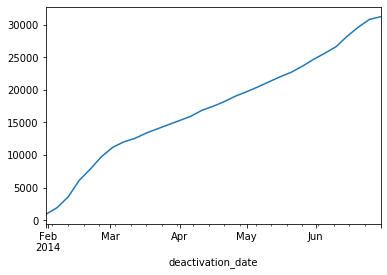

In [160]:
df_deactivation.cumsum().plot()

In [161]:
rate_deactivation_ast = df.loc[df["city"] == "Astapor",'city'].loc[ df["deactivated"] == True].count() / df.loc[df["city"] == "Astapor",'city'].count()
rate_deactivation_kings = df.loc[df["city"] == "King's Landing",'city'].loc[ df["deactivated"] == True].count() / df.loc[df["city"] == "King's Landing",'city'].count()
rate_deactivation_winterfell = df.loc[df["city"] == "Winterfell",'city'].loc[ df["deactivated"] == True].count() / df.loc[df["city"] == "Winterfell",'city'].count()

In [162]:
print(rate_deactivation_ast,rate_deactivation_kings, rate_deactivation_winterfell)


0.7442845046570703 0.37186574531095756 0.6480545080562221


In [163]:
## There is a clear difference between Winterfell and Astapor, where deactivation is high, and King's landing.I
## It could be possible that there is a fundamental difference in quality betwee cities. This means that Ultimate
## should either chose to pivot to the city where its successful, or pay more attention to the other cities. 

In [164]:
rate_deactivation =  (df[df["deactivated"] == True].count() / df.count())[0]
print(rate_deactivation)

0.62392


In [165]:
rate_deactivation_iphone = df.loc[df["phone"] == "iPhone",'phone'].loc[ df["deactivated"] == True].count() / df.loc[df["phone"] == "iPhone",'phone'].count()
rate_deactivation_android = df.loc[df["phone"] == "Android",'phone'].loc[ df["deactivated"] == True].count() / df.loc[df["phone"] == "Android",'phone'].count()
print(rate_deactivation_iphone,rate_deactivation_android)

0.5510670290902782 0.7905738250565837


In [166]:
## Also a substantial difference in deactivation rate betwen iPhone and Android. It could be possible that the iPhone
## app needs further development. 


In [167]:
rate_deactivation_black = df.loc[df["ultimate_black_user"] == True,'ultimate_black_user'].loc[ df["deactivated"] == True].count() / df.loc[df["ultimate_black_user"] == True,'phone'].count()
rate_deactivation_no_black = df.loc[df["ultimate_black_user"] == False,'ultimate_black_user'].loc[ df["deactivated"] == True].count() / df.loc[df["ultimate_black_user"] == False,'phone'].count()
print(rate_deactivation_black,rate_deactivation_no_black)

print("Number of Users using black cars" ,df.loc[df["ultimate_black_user"] == True,'ultimate_black_user'].count() )
print("Number of Users not using black cars" ,df.loc[df["ultimate_black_user"] == False,'ultimate_black_user'].count() )

## Ultimate, both from a retention and total count metric, is more successful in the economic options rather than t
## the luxurious offerings

0.5027401676337847 0.7046657201858544
Number of Users using black cars 18854
Number of Users not using black cars 31146


In [169]:
df['phone'].unique()

array(['iPhone', 'Android', None], dtype=object)

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# clf = LogisticRegression(random_state=0, solver='liblinear', multi_class='multinomial').fit(X, y)
number = LabelEncoder()
df['city'] = number.fit_transform(df['city'].astype('str'))
df['phone'] = number.fit_transform(df['phone'].astype('str'))
df['ultimate_black_user'] = number.fit_transform(df['ultimate_black_user'])

In [198]:
df_logistic = df[['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge','city','phone','surge_pct','ultimate_black_user','weekday_pct','deactivated']].dropna()
X = df_logistic.loc[:,df_logistic.columns != 'deactivated'].values
y = number.fit_transform(df_logistic.loc[:,df_logistic.columns == 'deactivated'].values)

/Users/omarrizkallah/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [203]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.65
[[2152 2907]
 [1504 5961]]
             precision    recall  f1-score   support

          0       0.59      0.43      0.49      5059
          1       0.67      0.80      0.73      7465

avg / total       0.64      0.65      0.63     12524

